- Achtergrond
- Data (organisatie + format)
- Model
- Reflectie

# Erytropoëse en hemoglobine productie
Erytropoëse is het proces waarbij erytrocyten worden geproduceerd vanuit stamcellen in ons lichaam. Het is de meest voorkomende cel binnen onze bloedbaan en wordt geproduceerd in ons beenmerg.

Beenmerg bevindt zich in het binnenste van beenderen, zoals het bekken en borstbeen. Hierin bevinden zich hematopoëtische stamcellen, welke prolifereren en differentiëren tot verschillende soorten bloedcellen. Hieronder vallen ook de erytrocyten, ofwel de rode bloedcellen. Deze erytrocyten differentiëren vanuit erytroblasten, voorlopers van de erytrocyt zoals deze in onze bloedbaan voorkomt. Erytrocyten zijn belangrijk, ze spelen namelijk een rol in de uitwisseling van O<sup>2</sup> en CO<sup>2</sup> in ons lichaam. Ze hebben een beetje een gekke vorm, bijna de vorm van een donut, weliswaar zonder opening in de binnenkant. Dit wordt 'biconcaaf' genoemd. Een erytrocyt heeft geen kern en heeft zijn rode kleur te danken aan de hemoglobine.

Een volwassen erytrocyt leeft zo'n 90 tot 120 dagen in onze bloedbaan. Erytrocyten die uit de circulatie worden gehaald, worden afgebroken in de milt en aangevuld vanuit het beenmerg met nieuwe cellen. De erytropoëse wordt geregeld door erytropoëtine, ook wel bekend als EPO. EPO wordt op zijn beurt gereguleerd door de hoeveelheid beschikbare zuurstof: bij een tekort aan zuurstof in de nieren wordt er meer EPO geproduceerd, wat het beenmerg stimuleert meer erytrocyten de bloedbaan in te laten gaan. 

Erytrocyten spelen een belangrijke rol in de transport van zuurstof. Hiervoor is de hemoglobine in de cel van belang. Hemoglobine bestaat uit vier subketens waarvan er twee om twee gelijk zijn aan elkaar. Elke keten bevat een heemmolecuul, op de afbeelding hieronder aangegeven als een rozig vierkantje. De heemmoleculen bevatten in het midden een ijzermolecuul (de rode bolletjes op de vierkantjes). Hieraan wordt zuurstof gebonden.

![Hemoglobin](Images/Hemoglobin.png)<br>
Bron: [https://pmgbiology.com/tag/haemoglobin/](https://pmgbiology.com/tag/haemoglobin/)

Het heem uit hemoglobine wordt geproduceerd vanuit protoporphyrin IX met behulp van ijzer. Dit proces vindt plaats in de mitochondria. Wanneer heem geproduceerd is wordt het globine deel van hemoglobine geproduceerd onder invloed van heem. Compleet hemoglobine bestaat dus uit twee keer twee subketens (2 α ketens en 2 β ketens) met in elke keten een heemgroep en ijzermolecuul. 


## Data
De data die in dit artikel gebruikt is voor het opzetten van een model is bijgeleverd in de Appendix, waar alle aanvullende gegevens staan (zo ook waardes voor bepaalde parameters en formules). Er zijn 3 tabellen met data, namelijk: 'Table 2 Dataset #1: Accumulated *<sup>59</sup>Fe* in Heme', 'Table 3 Dataset #2: The cells are first cultured in presence of iron (normal, nonradioactive isotope)' en 'Table 4 Dataset #3: Incorporation of <sup>3</sup>H-leucine in *β*-major globin'. 

In elke dataset staat de 'Exposure time (h)' met daaronder slechts één getallenreeks per tabel. De data is erg summier en is verkregen door muizen te infecteren met een virus en vervolgens erytrocyten te isoleren uit de milt. 

Helaas was het niet mogelijk de data direct te downloaden vanuit het artikel. Deze is overgenomen vanuit het artikel en omgezet in .csv bestanden.

## Model
Het maken van dit model was een pogint tot het reproduceren van resultaten uit een gekozen artikel. Het gekozen artikel heet '[Multi-scale Modelling of Erythropoiesis and Hemoglobin Production](https://link.springer.com/article/10.1007/s10904-016-0437-0#Tab4)' en is geschreven door A. Bouchnita, A. Rocca, E. Fanchon, M.J. Koury, J.M. Moulis & V. Volpert. Dit artikel is gekozen vanwege de interesse in hematologie en processen hier omheen. Nadat gecontroleerd was of er data aanwezig was en de benodigde formules ook benoemd werden, was dat voldoende om daadwerkelijk dit artikel te kiezen voor dit project.

Allereerst werd besloten om het proces in onderstaand figuur volledig te modelleren. Dit figuur is afkomstig uit het artikel dat gekozen is en gaat over onder andere de EPO regulatie
![Erythropoesis](Images/Erythropoesis.png)<br>
Bron: artikel

Na zorgvuldig zoeken, bleek er geen repo te bestaan van het model dat is geschreven. Al snel bleek het een te groot project te zijn om het hele proces uit te programmeren voor de duur van het project. Daarom werd gezocht naar reeds bestaande modellen. Helaas bleken ook deze niet openbaar te zijn, waardoor het roer voor het project omgegooid diende te worden. Eerst werd besloten alleen de linkerkant van het figuur mee te nemen in het model. Ook voor dit deel werd gezocht naar bestaande modellen, ook dit gaf geen resultaat. Hierop werd besloten dit zelf te gaan programmeren, echter met nog minder dan 2 weken te gaan, leek dat absoluut niet haalbaar. Na nogmaals het artikel goed doorgenomen te hebben, werd een goede oplossing gevonden: ook de hemoglobine productie stond weergegeven in formules en dit was een mooie manier om toch een model te kunnen schrijven met de beschikbare data. Er werd begonnen met het schrijven van het model.

Hieronder de gebruikte imports voor het model:

In [1]:
#imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

Er waren 3 datasets, deze zijn per stuk ingelezen:

In [9]:
#import data
fe_heme = pd.read_csv('Accumulated_fe_in_Heme.csv', sep=';')
cells = pd.read_csv('Cultured_cells.csv', sep=';')
globin = pd.read_csv('Leucine_in_major_globin.csv', sep=';')

In de formule (dFe/dt = k<sub>1</sub>Fe<sub>ex</sub> - k<sub>2</sub>Fe - k<sub>3</sub>Fe) staan meerdere parameters waarvoor vaststaande waardes beschikbaar zijn. De bekende waardes zijn hieronder ingevoerd. Sommige parameters stonden in de tekst, waar anderen in 'Table 1: Results of the search procedure' stonden.

In [2]:
#parameters
k_1 = (1.4*10**-3)
k_2 = (3.75*10**-10)
k_3 = ((7.4*10**-9)*(7.2*10**-7))
Fe_ex = 1 #de waarde van Fe_ex is niet bekend, dit is een zelf bedacht getal

Hieronder is de het begin van het model gemaakt, door de vergelijking om te zetten in code. 

In [11]:
#model/vergelijking
def model(t, y):
    Fe = y[0]
    dFe_dt = k_1 * Fe_ex - k_2 * Fe - k_3 * Fe
    return [dFe_dt]

Fe0 = [0] #Beginwaarde Fe
t_span = (0, 50) #tijdspanne
t_eval = np.linspace(t_span[0], t_span[1], 500) # aantal tijdstappen

solution = solve_ivp(model, t_span, Fe0, t_eval=t_eval)

Dit wordt vervolgens uitgezet in een grafiek:

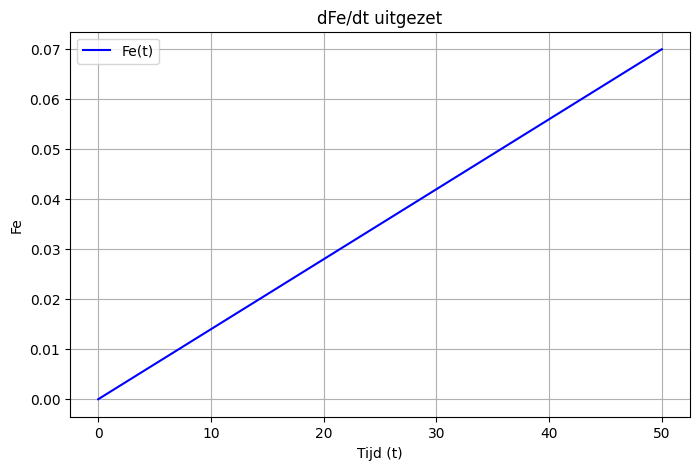

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(solution.t, solution.y[0], label='Fe(t)', color='blue')
plt.title('dFe/dt uitgezet')
plt.xlabel('Tijd (t)')
plt.ylabel('Fe')
plt.legend()
plt.grid()
plt.show()

Deze code is niet compleet en nog niet volledig omgezet, omdat er vervolgens tegen andere dingen werd aangelopen.

## Reflectie
Zoals te lezen is, heeft het proces heel wat haken en ogen gekend. Het begin liep eigenlijk prima, het kiezen van het artikel had niet veel om handen 
